In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Random Forest

In [6]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'RF_f1_time_md.csv'

# Read the CSV file into a DataFrame
rfdf = pd.read_csv(csv_file_path)

rfdf.head()

txtmodel = 'Random Forest'
dfp = rfdf

In [7]:
dfp.head()

,max_depth,n_learner,f1_score,elapsed_time,total_score
0,94,72,0.957245,1.582486,0.831595
1,38,14,0.944755,0.342507,0.899905
2,73,59,0.959089,1.438960,0.857310
3,78,66,0.957738,1.431218,0.851114
4,77,3,0.900717,0.123875,0.821240


### fitness vs. Hyperparameters

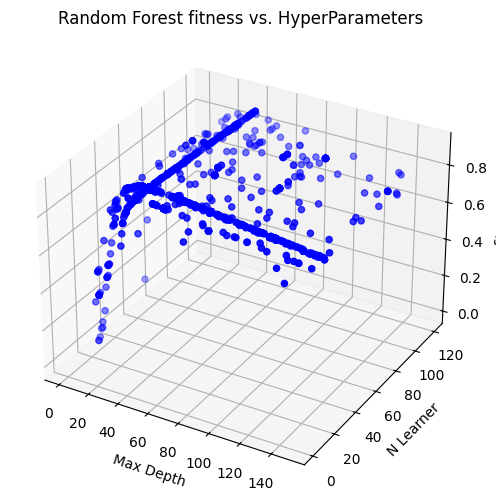

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]
ax.scatter(dfp['max_depth'], dfp['n_learner'], dfp['total_score'], c='b', marker='o', label='Within Tolerance')
ax.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax.set_xlabel('Max Depth')
ax.set_ylabel('N Learner')
ax.set_zlabel('fitness')
tstr=f'{txtmodel} fitness vs. HyperParameters'
ax.set_title(tstr)

# Save as SVG
plt.savefig(f'3D_{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'3D_{tstr.replace(" ", "_")}.png', format='png')

plt.show()


### total score vs hyperparameters

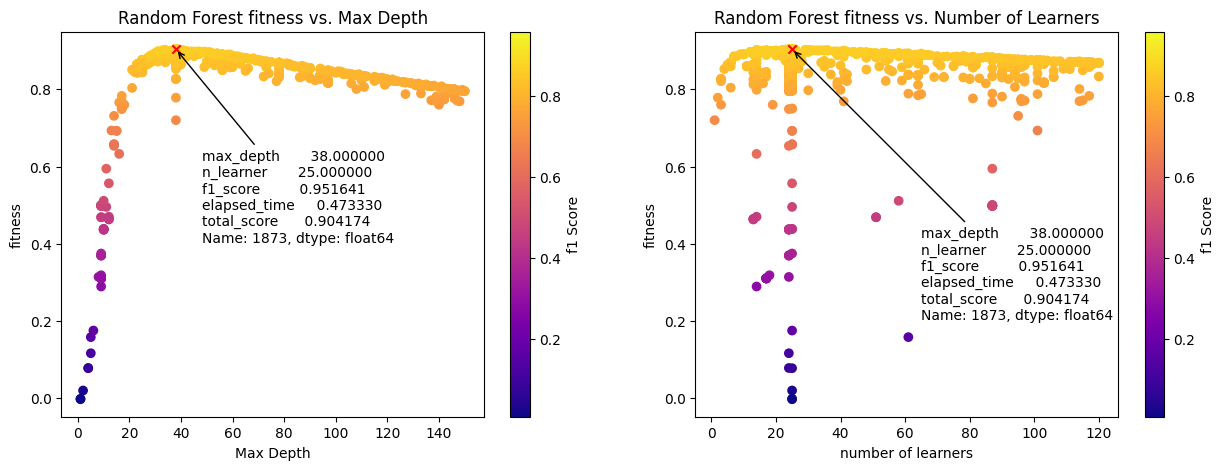

In [9]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score'] 
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 5))
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.scatter(dfp['max_depth'], dfp['total_score'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='f1 Score', ax=ax1)  # Fixed typo: 'plt.gca()' to 'ax1'

ax1.set_xlabel('Max Depth')
ax1.set_ylabel('fitness')
ax1.set_title(f'{txtmodel} fitness vs. Max Depth')


# Label the point with the minimum max_depth
ax1.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['max_depth'], max_total_score_row['total_score']),
             xytext=(max_total_score_row['max_depth']+10, max_total_score_row['total_score']-0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 2 (Merged with Subplot 2)
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.scatter(dfp['n_learner'], dfp['total_score'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax2.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='f1 Score', ax=ax2)  # Fixed typo: 'plt.gca()' to 'ax1'

ax2.set_xlabel('number of learners')
ax2.set_ylabel('fitness')
ax2.set_title(f'{txtmodel} fitness vs. Number of Learners')


# Label the point with the minimum max_depth
ax2.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['n_learner'], max_total_score_row['total_score']),
             xytext=(max_total_score_row['n_learner']+40, max_total_score_row['total_score']-0.7),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )


tstr = f"2D {txtmodel} fitness vs Hyperparameters"
# Save as SVG
plt.savefig(f'{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'{tstr.replace(" ", "_")}.png', format='png')

plt.show()

### Elapsed Time vs. hyperparameters and f1 score

C:\Users\Hamid\AppData\Local\Temp\ipykernel_13416\2400450901.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))
C:\Users\Hamid\AppData\Local\Temp\ipykernel_13416\2400450901.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


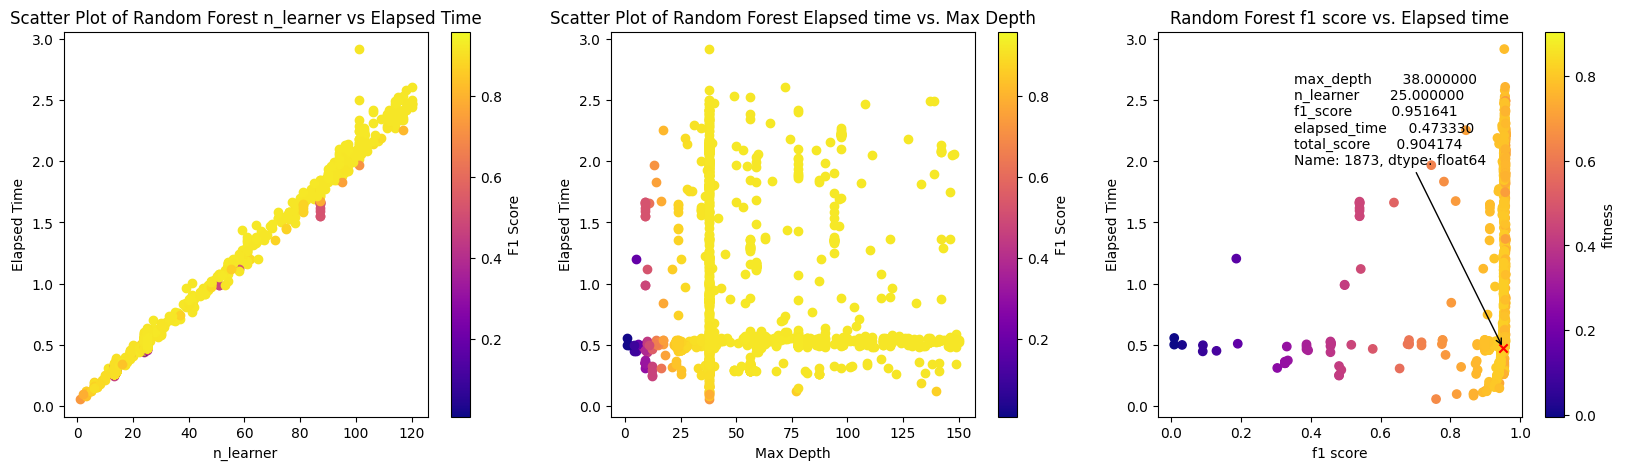

In [10]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 3), (0, 0))
cmap = cm.plasma  # Choose a colormap, e.g., viridis

for index, row in dfp.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    alpha_value = row['f1_score'] 

    # Plot the point for each row with alpha color
    ax1.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='F1 Score', ax=ax1)  # Specify the axis for the colorbar

# Set labels and title
ax1.set_xlabel('n_learner')
ax1.set_ylabel('Elapsed Time')
ax1.set_title(f"Scatter Plot of {txtmodel} n_learner vs Elapsed Time")

ax2 = plt.subplot2grid((1, 3), (0, 1))
for index, row in dfp.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    alpha_value = row['f1_score'] 
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='F1 Score', ax=ax2)  # Specify the axis for the colorbar

# Set labels and title
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Elapsed Time')
ax2.set_title(f'Scatter Plot of {txtmodel} Elapsed time vs. Max Depth')


cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax3.scatter(dfp['f1_score'], dfp['elapsed_time'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax3.scatter(max_total_score_row['f1_score'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='fitness', ax=ax3)  # Fixed typo: 'plt.gca()' to 'ax1'

ax3.set_xlabel('f1 score')
ax3.set_ylabel('Elapsed Time')
ax3.set_title(f'{txtmodel} f1 score vs. Elapsed time')


# Label the point with the minimum max_depth
ax3.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['f1_score'], max_total_score_row['elapsed_time']),
             xytext=(max_total_score_row['f1_score']-0.6, max_total_score_row['elapsed_time']+1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Display legend
# plt.legend()
tstr = f"2D {txtmodel} Elapsed time vs hyperparameters and f1score"
# Save as SVG
plt.savefig(f'{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'{tstr.replace(" ", "_")}.png', format='png')
# Show the plot
plt.show()

## ADABoost

In [23]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'ADA_f1_time_md.csv'

# Read the CSV file into a DataFrame
dfp = pd.read_csv(csv_file_path)

dfp.head()

txtmodel = 'ADABoost'

In [12]:
dfp.head()

,max_depth,n_learner,f1_score,elapsed_time,total_score
0,78,34,0.953320,3.961863,0.835701
1,13,48,0.372763,5.610858,0.303654
2,5,14,0.028684,1.665263,0.007031
3,22,13,0.601118,1.532122,0.563797
4,34,7,0.754384,0.839161,0.711992


### fitness vs. Hyperparameters

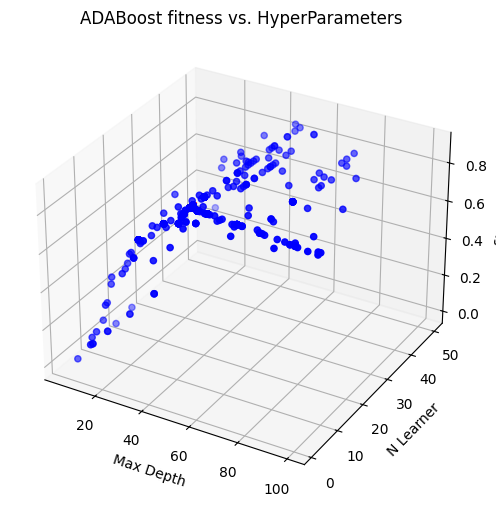

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]
ax.scatter(dfp['max_depth'], dfp['n_learner'], dfp['total_score'], c='b', marker='o', label='Within Tolerance')
ax.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax.set_xlabel('Max Depth')
ax.set_ylabel('N Learner')
ax.set_zlabel('fitness')
tstr=f'{txtmodel} fitness vs. HyperParameters'
ax.set_title(tstr)

# Save as SVG
plt.savefig(f'3D_{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'3D_{tstr.replace(" ", "_")}.png', format='png')

plt.show()


### total score vs hyperparameters

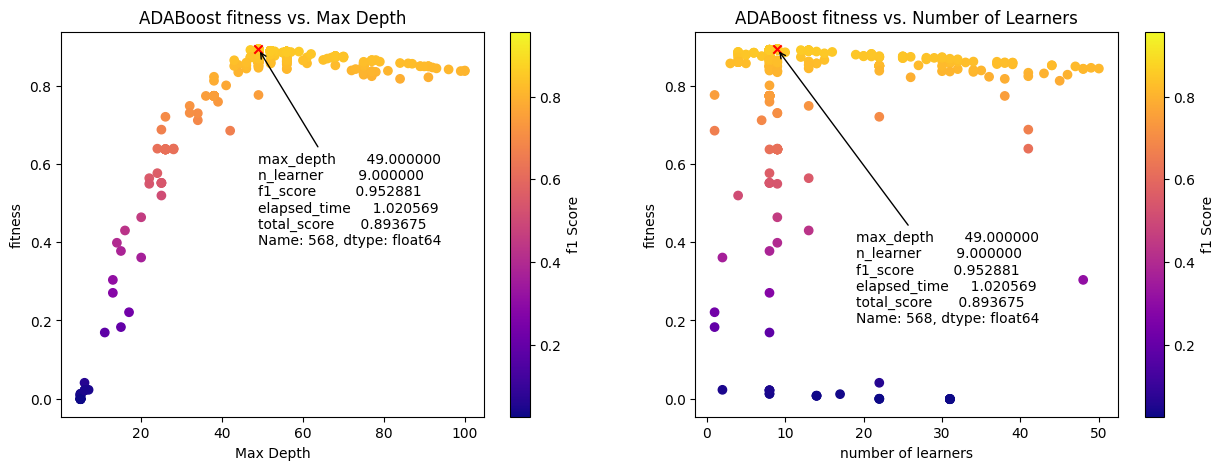

In [14]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score'] 
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 5))
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.scatter(dfp['max_depth'], dfp['total_score'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='f1 Score', ax=ax1)  # Fixed typo: 'plt.gca()' to 'ax1'

ax1.set_xlabel('Max Depth')
ax1.set_ylabel('fitness')
ax1.set_title(f'{txtmodel} fitness vs. Max Depth')


# Label the point with the minimum max_depth
ax1.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['max_depth'], max_total_score_row['total_score']),
             xytext=(max_total_score_row['max_depth'], max_total_score_row['total_score']-0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 2 (Merged with Subplot 2)
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.scatter(dfp['n_learner'], dfp['total_score'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax2.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='f1 Score', ax=ax2)  # Fixed typo: 'plt.gca()' to 'ax1'

ax2.set_xlabel('number of learners')
ax2.set_ylabel('fitness')
ax2.set_title(f'{txtmodel} fitness vs. Number of Learners')


# Label the point with the minimum max_depth
ax2.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['n_learner'], max_total_score_row['total_score']),
             xytext=(max_total_score_row['n_learner']+10, max_total_score_row['total_score']-0.7),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )


tstr = f"2D {txtmodel} fitness vs Hyperparameters"
# Save as SVG
plt.savefig(f'{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'{tstr.replace(" ", "_")}.png', format='png')

plt.show()

### Elapsed Time vs. hyperparameters and f1 score

C:\Users\Hamid\AppData\Local\Temp\ipykernel_13416\2597466714.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))
C:\Users\Hamid\AppData\Local\Temp\ipykernel_13416\2597466714.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


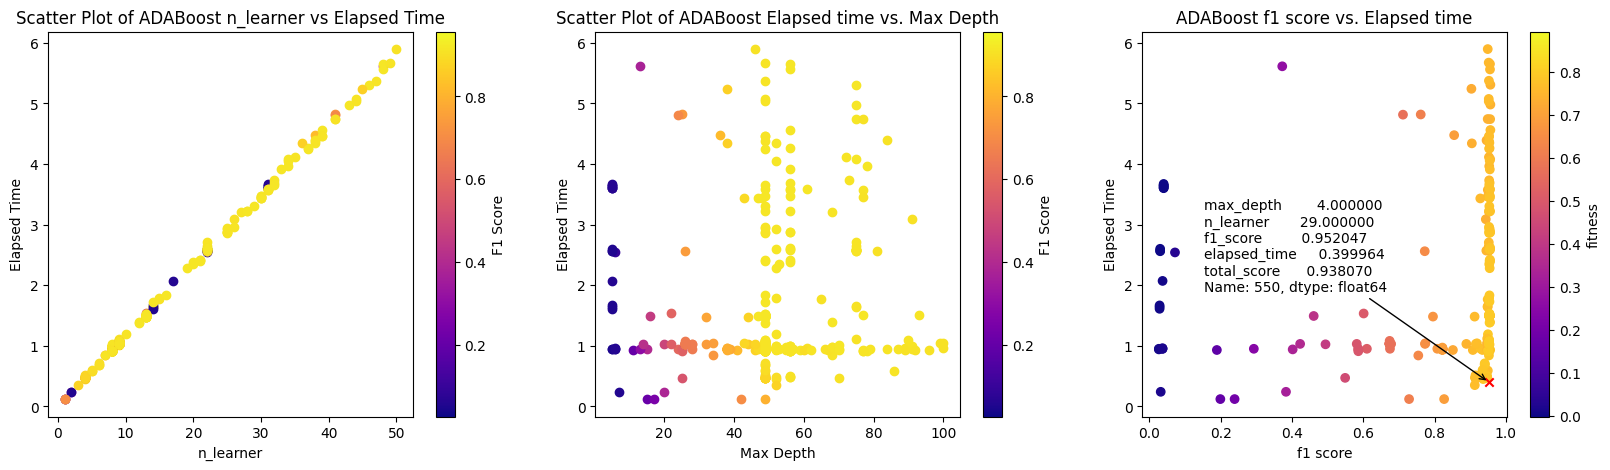

In [24]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 3), (0, 0))
cmap = cm.plasma  # Choose a colormap, e.g., viridis

for index, row in dfp.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    alpha_value = row['f1_score'] 

    # Plot the point for each row with alpha color
    ax1.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='F1 Score', ax=ax1)  # Specify the axis for the colorbar

# Set labels and title
ax1.set_xlabel('n_learner')
ax1.set_ylabel('Elapsed Time')
ax1.set_title(f"Scatter Plot of {txtmodel} n_learner vs Elapsed Time")

ax2 = plt.subplot2grid((1, 3), (0, 1))
for index, row in dfp.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    alpha_value = row['f1_score'] 
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='F1 Score', ax=ax2)  # Specify the axis for the colorbar

# Set labels and title
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Elapsed Time')
ax2.set_title(f'Scatter Plot of {txtmodel} Elapsed time vs. Max Depth')


cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax3.scatter(dfp['f1_score'], dfp['elapsed_time'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax3.scatter(max_total_score_row['f1_score'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='fitness', ax=ax3)  # Fixed typo: 'plt.gca()' to 'ax1'

ax3.set_xlabel('f1 score')
ax3.set_ylabel('Elapsed Time')
ax3.set_title(f'{txtmodel} f1 score vs. Elapsed time')


# Label the point with the minimum max_depth
ax3.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['f1_score'], max_total_score_row['elapsed_time']),
             xytext=(max_total_score_row['f1_score']-0.8, max_total_score_row['elapsed_time']+1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Display legend
# plt.legend()
tstr = f"2D {txtmodel} Elapsed time vs hyperparameters and f1score"
# Save as SVG
plt.savefig(f'{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'{tstr.replace(" ", "_")}.png', format='png')
# Show the plot
plt.show()

## XGBoost

In [16]:
# Assuming the CSV file has the same name as the original text file
csv_file_path = 'XGB_f1_time_md.csv'

# Read the CSV file into a DataFrame
dfp = pd.read_csv(csv_file_path)

dfp.head()

txtmodel = 'XGBoost'

In [17]:
dfp.head()

,max_depth,n_learner,f1_score,elapsed_time,total_score
0,13,48,0.954629,0.569940,0.897581
1,37,2,0.239667,0.049996,0.065416
2,2,50,0.950178,0.549927,0.906489
3,32,37,0.953022,0.469943,0.896177
4,11,36,0.952470,0.499953,0.919417


### fitness vs. Hyperparameters

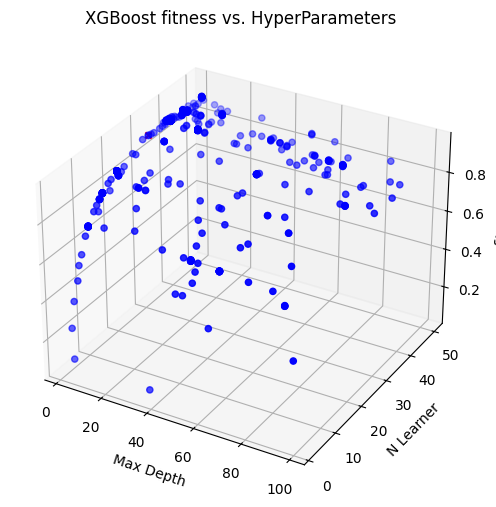

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]
ax.scatter(dfp['max_depth'], dfp['n_learner'], dfp['total_score'], c='b', marker='o', label='Within Tolerance')
ax.scatter(max_total_score_row['max_depth'], max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')
ax.set_xlabel('Max Depth')
ax.set_ylabel('N Learner')
ax.set_zlabel('fitness')
tstr=f'{txtmodel} fitness vs. HyperParameters'
ax.set_title(tstr)

# Save as SVG
plt.savefig(f'3D_{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'3D_{tstr.replace(" ", "_")}.png', format='png')

plt.show()


### total score vs hyperparameters

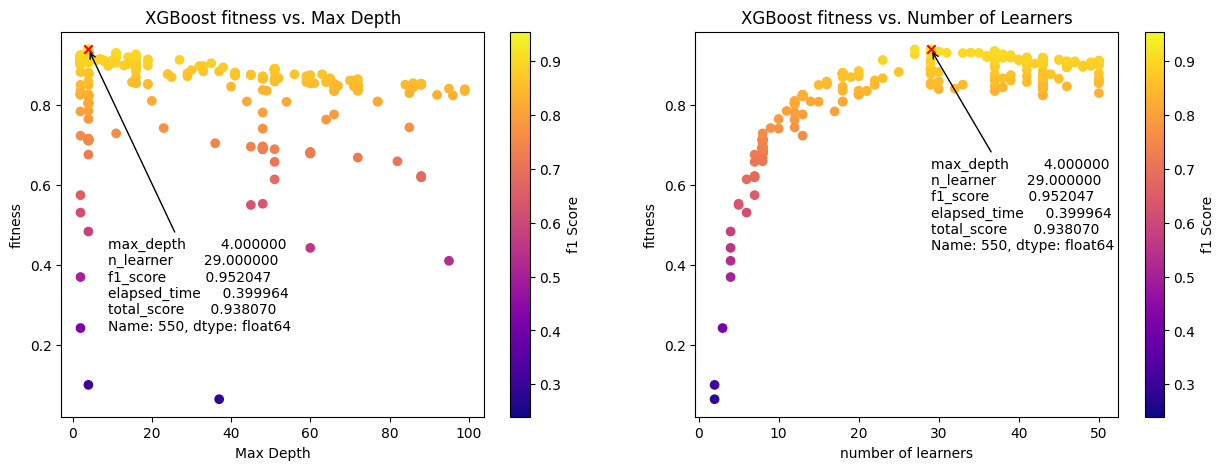

In [19]:
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score'] 
max_total_score_row = dfp.loc[dfp['total_score'].idxmax()]

# Plot 3D scatter plot
fig = plt.figure(figsize=(15, 5))
cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.scatter(dfp['max_depth'], dfp['total_score'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax1.scatter(max_total_score_row['max_depth'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='f1 Score', ax=ax1)  # Fixed typo: 'plt.gca()' to 'ax1'

ax1.set_xlabel('Max Depth')
ax1.set_ylabel('fitness')
ax1.set_title(f'{txtmodel} fitness vs. Max Depth')


# Label the point with the minimum max_depth
ax1.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['max_depth'], max_total_score_row['total_score']),
             xytext=(max_total_score_row['max_depth']+5, max_total_score_row['total_score']-0.7),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Subplot 2 (Merged with Subplot 2)
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.scatter(dfp['n_learner'], dfp['total_score'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax2.scatter(max_total_score_row['n_learner'], max_total_score_row['total_score'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='f1 Score', ax=ax2)  # Fixed typo: 'plt.gca()' to 'ax1'

ax2.set_xlabel('number of learners')
ax2.set_ylabel('fitness')
ax2.set_title(f'{txtmodel} fitness vs. Number of Learners')


# Label the point with the minimum max_depth
ax2.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['n_learner'], max_total_score_row['total_score']),
             xytext=(max_total_score_row['n_learner'], max_total_score_row['total_score']-0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )


tstr = f"2D {txtmodel} fitness vs Hyperparameters"
# Save as SVG
plt.savefig(f'{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'{tstr.replace(" ", "_")}.png', format='png')

plt.show()

### Elapsed Time vs. hyperparameters and f1 score

C:\Users\Hamid\AppData\Local\Temp\ipykernel_13416\632891707.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))
C:\Users\Hamid\AppData\Local\Temp\ipykernel_13416\632891707.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


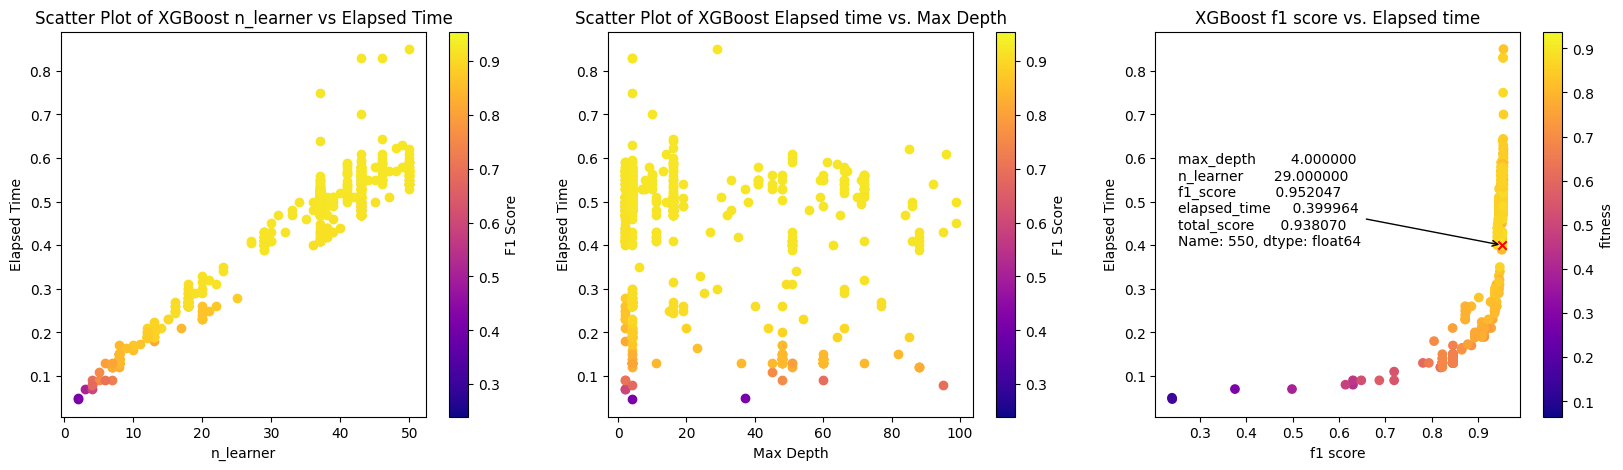

In [22]:
# Plot 3D scatter plot
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot2grid((1, 3), (0, 0))
cmap = cm.plasma  # Choose a colormap, e.g., viridis

for index, row in dfp.iterrows():
    n_learner = row['n_learner']
    elapsed_time = row['elapsed_time']
    alpha_value = row['f1_score'] 

    # Plot the point for each row with alpha color
    ax1.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))


# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='F1 Score', ax=ax1)  # Specify the axis for the colorbar

# Set labels and title
ax1.set_xlabel('n_learner')
ax1.set_ylabel('Elapsed Time')
ax1.set_title(f"Scatter Plot of {txtmodel} n_learner vs Elapsed Time")

ax2 = plt.subplot2grid((1, 3), (0, 1))
for index, row in dfp.iterrows():
    n_learner = row['max_depth']
    elapsed_time = row['elapsed_time']
    alpha_value = row['f1_score'] 
    
    # Plot the point for each row
    plt.scatter(n_learner, elapsed_time, label=f'Row {index + 1}', c=cmap(alpha_value))

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['f1_score'])
plt.colorbar(sm, label='F1 Score', ax=ax2)  # Specify the axis for the colorbar

# Set labels and title
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Elapsed Time')
ax2.set_title(f'Scatter Plot of {txtmodel} Elapsed time vs. Max Depth')


cmap = cm.plasma  # Choose a colormap, e.g., viridis
alpha_value = dfp['total_score']

# Subplot 1 (Merged with Subplot 2)
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax3.scatter(dfp['f1_score'], dfp['elapsed_time'], c=cmap(alpha_value), marker='o', label='Within Tolerance')  # Fixed typo: 'camp' to 'cmap'
ax3.scatter(max_total_score_row['f1_score'], max_total_score_row['elapsed_time'], c='r', marker='x', label='Max Total Score')

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(dfp['total_score'])
plt.colorbar(sm, label='fitness', ax=ax3)  # Fixed typo: 'plt.gca()' to 'ax1'

ax3.set_xlabel('f1 score')
ax3.set_ylabel('Elapsed Time')
ax3.set_title(f'{txtmodel} f1 score vs. Elapsed time')


# Label the point with the minimum max_depth
ax3.annotate(str(max_total_score_row), 
             xy=(max_total_score_row['f1_score'], max_total_score_row['elapsed_time']),
             xytext=(max_total_score_row['f1_score']-0.7, max_total_score_row['elapsed_time']),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )

# Display legend
# plt.legend()
tstr = f"2D {txtmodel} Elapsed time vs hyperparameters and f1score"
# Save as SVG
plt.savefig(f'{tstr.replace(" ", "_")}.svg', format='svg')
# Save as PNG
plt.savefig(f'{tstr.replace(" ", "_")}.png', format='png')
# Show the plot
plt.show()